In [21]:
import numpy
import scipy.io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [22]:
def task2_genNeuron(W, X, applied_fun):
    
    # adding a column of ones 
    X_o = numpy.c_[numpy.ones(len(X)), X]
    
    Y = X_o @ W
    
    # finally return Y with whatever function g is applied
    return numpy.apply_along_axis(applied_fun, 0, Y)

In [37]:
def task2_hNeuron(W, X):    
    def step(x):
        return 1 * (x > 0)
    return task2_genNeuron(W, X, step)

def task2_sNeuron(W, X):
    def g(x):
        return 1/(1+numpy.exp(numpy.longdouble(-x)))
    return task2_genNeuron(W, X, g)

orig:   y < -4.700511036979204 * x + 24.533853223436726
tran:   0 < -4.700511036979204*x + -1*y + 24.533853223436726
stan:   0 < -0.19159285719085067*x + -0.04076000581289526*y + 1.0
orig:   y > -1.2177989674601823 * x + 4.932418326649072
tran:   0 < 1.2177989674601823*x + 1*y + -4.932418326649072
stan:   0 < 0.24689693509583485*x + 0.2027403058246619*y + -1.0
orig:   y > -0.415106777241107 * x + 3.340816171116984
tran:   0 < 0.415106777241107*x + 1*y + -3.340816171116984
stan:   0 < 0.1242531034272138*x + 0.2993280530205454*y + -1.0
orig:   y < 0.4081176380894294 * x + 4.418474556493729
tran:   0 < 0.4081176380894294*x + -1*y + 4.418474556493729
stan:   0 < 0.09236618495168845*x + -0.22632245296746664*y + 1.0
[[1.0, -0.19159285719085067, -0.04076000581289526], [-1.0, 0.24689693509583485, 0.2027403058246619], [-1.0, 0.1242531034272138, 0.2993280530205454], [1.0, 0.09236618495168845, -0.22632245296746664]]
[-0.8, 0.25, 0.25, 0.25, 0.25]


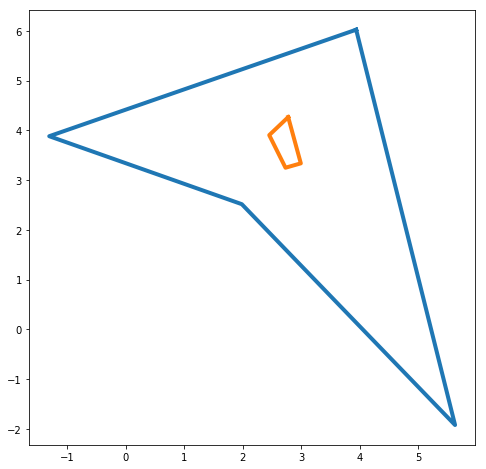

In [24]:
coords2 = [(2.77561,4.26753),(2.45166, 3.90597), (2.72966, 3.25103), (2.99143, 3.33845)]
coords = [(3.93753,6.02545), (5.62821, -1.92161), (1.98283, 2.51773), (-1.30907, 3.88422)]
coords = coords + [coords[0]]
coords2 = coords2 + [coords2[0]]

xs = [c[0] for c in coords]
ys = [c[1] for c in coords]

xs2 = [c[0] for c in coords2]
ys2 = [c[1] for c in coords2]

first_layer = []
for i in range(4):
    dx = xs[i+1]-xs[i]
    dy = ys[i+1]-ys[i]
    a = dy/dx
    b = ys[i] - a*xs[i]
    print(f"orig:   y {'<' if i in [0,3] else '>'} {a} * x + {b}")
    if i in [0,3]:
        w0, wx, wy = b, a, (-1)
    else:
        w0, wx, wy = -b, -a, 1
    
    print(f'tran:   0 < {wx}*x + {wy}*y + {w0}')
    norm_const = max(abs(wx),abs(wy),abs(w0))
    wx, wy, w0 = wx/norm_const, wy/norm_const, w0/norm_const
    print(f'stan:   0 < {wx}*x + {wy}*y + {w0}')
    first_layer.append([w0,wx,wy])

plt.plot(xs,ys, linewidth=4)
plt.plot(xs2,ys2, linewidth=4)
plt.savefig('task2_polygons.png')

print(first_layer)
upper_neuron = [-4/5, 1/4, 1/4, 1/4, 1/4]
print(upper_neuron)

In [15]:
# TODO !!! redo this so that A is here, not B

with open('task2_hNN_A_weights.txt', 'w') as f:
    # first layer
    num=1
    for w0, wx, wy in first_layer:
        print(f'W({1},{num},{0}) : {w0}', file=f)
        print(f'W({1},{num},{1}) : {wx}', file=f)
        print(f'W({1},{num},{2}) : {wy}', file=f)
        num += 1

    # second layer
    num=0
    for w in upper_neuron:
        print(f'W({2},{1},{num}) : {w}', file=f)
        num += 1

In [25]:
def listToColV(li):
    return numpy.asarray(li).reshape(-1,1)

# task 2.4
def task2_hNN_A(X):
    first_layer = [[1.0, 0.9541936586843557, -0.85493703875096],
                   [-1.0, 0.2433319217436556, 0.1032862159048711],
                   [-1.0, -0.14275094489266318, 0.4274526978329043], 
                   [1.0, -0.265467958624089, -0.061666696980078]]
    upper_neuron = [-0.8, 0.25, 0.25, 0.25, 0.25]
    
   
    first_layer_results = [task2_hNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    final_result = task2_hNeuron(listToColV(upper_neuron), first_layer_X)
    return final_result

X_test = numpy.vstack((numpy.array((0.0, 0.0)), 
                       numpy.array((2.5, 3.3)), 
                       numpy.array((2.8, 3.6)), 
                       numpy.array((2.7, 3.5)),
                       numpy.array((3.0, 3.4)),
                       numpy.array((2.5, 4.0)),
                       numpy.array((2.5, 3.9))
                      ))
Z = task2_hNN_A(X_test)
print(Z)
Zs = [z[0] for z in Z]

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]


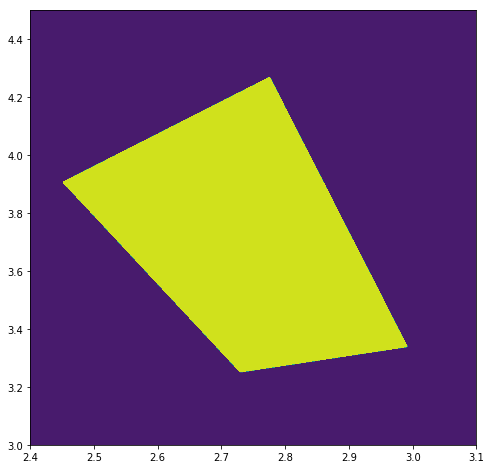

In [30]:
# task 2.5
X_N, Y_N = 1000, 1000
x = numpy.linspace(2.4, 3.1, X_N)
y = numpy.linspace(3.0, 4.5, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_hNN_A(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_hNN_A.pdf')

In [31]:
# task 2.6
def task2_hNN_AB(X):
    first_layer = [
                    [1.0, 0.9541936586843557, -0.85493703875096], 
                    [-1.0, 0.2433319217436556, 0.1032862159048711], 
                    [-1.0, -0.14275094489266318, 0.4274526978329043], 
                    [1.0, -0.265467958624089, -0.061666696980078],
                    [1.0, -0.19159285719085067, -0.04076000581289526], 
                    [-1.0, 0.24689693509583485, 0.2027403058246619], 
                    [-1.0, 0.1242531034272138, 0.2993280530205454], 
                    [1.0, 0.09236618495168845, -0.22632245296746664]
    ]
    
    second_layer = [
                    [-0.8, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0], 
                    [-(1/2+1/16), 0, 0, 0, 0, 1/4, 1/8, 1/8, 1/4]
    ]
    
    final_neuron = [-0.5, -1.0, 1.0]
    
    first_layer_results = [task2_hNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    
    second_layer_results = [task2_hNeuron(listToColV(W), first_layer_X) for W in second_layer]
    second_layer_X = numpy.column_stack(second_layer_results)
    
    final_result = task2_hNeuron(listToColV(final_neuron), second_layer_X)
    
    return final_result

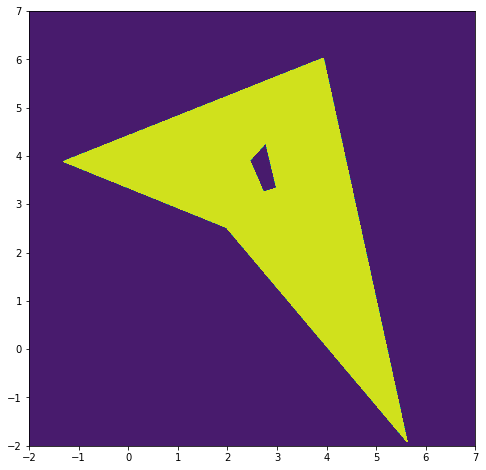

In [33]:
# task 2.7
X_N, Y_N = 1000, 1000
x = numpy.linspace(-2, 7, X_N)
y = numpy.linspace(-2, 7, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_hNN_AB(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_hNN_AB.pdf')

In [35]:
# task 2.8
def task2_sNN_AB(X):
    first_layer = [
                    [1.0, 0.9541936586843557, -0.85493703875096], 
                    [-1.0, 0.2433319217436556, 0.1032862159048711], 
                    [-1.0, -0.14275094489266318, 0.4274526978329043], 
                    [1.0, -0.265467958624089, -0.061666696980078],
                    [1.0, -0.19159285719085067, -0.04076000581289526], 
                    [-1.0, 0.24689693509583485, 0.2027403058246619], 
                    [-1.0, 0.1242531034272138, 0.2993280530205454], 
                    [1.0, 0.09236618495168845, -0.22632245296746664]
    ]
    
    def make_big(vec):
        return (numpy.asarray(vec)*1000.0).tolist()
    
    first_layer = [make_big(neuron) for neuron in first_layer]
    
    
    second_layer = [
                    make_big([-0.8, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0]), 
                    make_big([-(1/2+1/16), 0, 0, 0, 0, 1/4, 1/8, 1/8, 1/4]),
    ]
    
    final_neuron = make_big([-0.5, -1.0, 1.0])
    
    first_layer_results = [task2_sNeuron(listToColV(W), X) for W in first_layer]
    first_layer_X = numpy.column_stack(first_layer_results)
    
    second_layer_results = [task2_sNeuron(listToColV(W), first_layer_X) for W in second_layer]
    second_layer_X = numpy.column_stack(second_layer_results)
    
    final_result = task2_sNeuron(listToColV(final_neuron), second_layer_X)
    
    return final_result

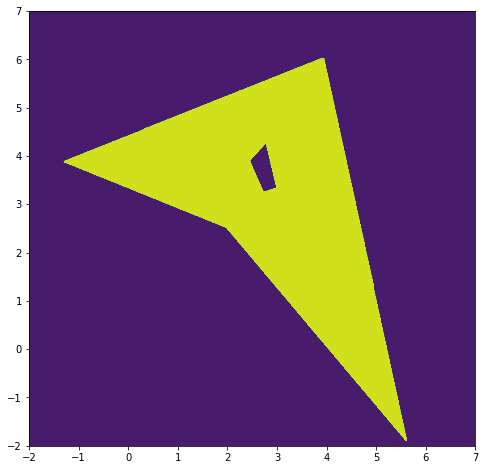

In [38]:
# task 2.9
X_N, Y_N = 1000, 1000
x = numpy.linspace(-2, 7, X_N)
y = numpy.linspace(-2, 7, Y_N)

X, Y = numpy.meshgrid(x, y)

X_grid = []
for i in range(Y_N):
    for j in range(X_N):
        X_grid.append([X.item(i,j), Y.item(i,j)])

X_grid = numpy.asarray(X_grid)
Y_grid = task2_sNN_AB(X_grid)

Z = Y_grid.reshape((Y_N, X_N))
        
plt.contourf(X, Y, Z)
plt.savefig('t2_regions_sNN_AB.pdf')